In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/.DS_Store
../input/heart.csv
../input/iris/Iris.csv
../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv
../input/classification-suv-dataset/Social_Network_Ads.csv
../input/wine-reviews/.DS_Store
../input/wine-reviews/winemag-data-130k-v2.csv
../input/wine-reviews/winemag-data-130k-v2.json
../input/wine-reviews/winemag-data_first150k.csv
../input/random-linear-regression/test.csv
../input/random-linear-regression/train.csv
../input/solar-power-generation-data/Plant_2_Generation_Data.csv
../input/solar-power-generation-data/Plant_1_Generation_Data.csv
../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv
../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv
../input/svm-classification/SVM_Classification.R
../input/svm-classification/UniversalBank.csv
../input/svm-classification/Activity Sheet.docx
../input/house-prices-advanced-regression-techniques/test.csv
../input/house-prices-advanced-regression-techniques/data_description.txt
.

In [2]:
plant_1_weather_sensor_data = pd.read_csv('../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv')
plant_1_generation_data = pd.read_csv('../input/solar-power-generation-data/Plant_1_Generation_Data.csv')
plant_2_weather_sensor_data = pd.read_csv('../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv')
plant_2_generation_data = pd.read_csv('../input/solar-power-generation-data/Plant_2_Generation_Data.csv')
print('success')

success


# Describe the data

In [3]:
plant_1_weather_sensor_data.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415     0.000000
25%    4135001.0            22.705182           21.090553     0.000000
50%    4135001.0            24.613814           24.618060     0.024653
75%    4135001.0            27.920532           41.307840     0.449588
max    4135001.0            35.252486           65.545714     1.221652

In [4]:
plant_1_generation_data.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06

In [5]:
plant_2_weather_sensor_data.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3259.0          3259.000000         3259.000000  3259.000000
mean   4136001.0            28.069400           32.772408     0.232737
std          0.0             4.061556           11.344034     0.312693
min    4136001.0            20.942385           20.265123     0.000000
25%    4136001.0            24.602135           23.716881     0.000000
50%    4136001.0            26.981263           27.534606     0.019040
75%    4136001.0            31.056757           40.480653     0.438717
max    4136001.0            39.181638           66.635953     1.098766

In [6]:
plant_2_generation_data.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0    246.701961    241.277825   3294.890295  6.589448e+08
std          0.0    370.569597    362.112118   2919.448386  7.296678e+08
min    4136001.0      0.000000      0.000000      0.000000  0.000000e+00
25%    4136001.0      0.000000      0.000000    272.750000  1.996494e+07
50%    4136001.0      0.000000      0.000000   2911.000000  2.826276e+08
75%    4136001.0    446.591667    438.215000   5534.000000  1.348495e+09
max    4136001.0   1420.933333   1385.420000   9873.000000  2.247916e+09

In [7]:
plant_1_weather_sensor_data.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

In [8]:
plant_1_generation_data.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0

In [9]:
plant_2_weather_sensor_data.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0

In [10]:
plant_2_generation_data.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4  2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  
0  9425.000000  2.429011e+06  
1     0.000000  1.215279e+09  
2  3075.333333  2.247720e+09  
3   269.933333  1.704250e+06  
4  3177.000000  1.994153e+07

# Check if any missing values

In [11]:
plant_1_weather_sensor_data.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [12]:
plant_1_generation_data.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [13]:
plant_1_weather_sensor_data.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [14]:
plant_2_generation_data.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

# Total number of Inverters

In [15]:
plant_1_irradiation = plant_1_weather_sensor_data['IRRADIATION']
sum(plant_1_irradiation)

726.4914252689014

In [16]:
plant_2_irradiation = plant_2_weather_sensor_data['IRRADIATION']
sum(plant_2_irradiation)

758.4898169359271

# Maximum Ambient Temperature

In [17]:
plant_1_ambient_temperature = plant_1_weather_sensor_data['AMBIENT_TEMPERATURE']
max(plant_1_ambient_temperature)

35.25248613333334

In [18]:
plant_2_ambient_temperature = plant_2_weather_sensor_data['AMBIENT_TEMPERATURE']
max(plant_2_ambient_temperature)

39.18163776666667

In [19]:
plant_1_weather_sensor_data.size

19092

In [20]:
plant_2_weather_sensor_data.size

19554

In [21]:
plant_2_generation_data.iloc[[max(plant_2_generation_data['DC_POWER'])]]

DATE_TIME  PLANT_ID       SOURCE_KEY    DC_POWER  AC_POWER  \
1420  2020-05-15 16:00:00   4136001  V94E5Ben1TlhnDV  672.766667    658.96   

      DAILY_YIELD   TOTAL_YIELD  
1420  8789.733333  1.412092e+09

In [22]:
plant_1_generation_data.iloc[[max(plant_1_generation_data['DC_POWER'])]]

DATE_TIME  PLANT_ID       SOURCE_KEY     DC_POWER    AC_POWER  \
14471  22-05-2020 15:00   4135001  ZoEaEvLYb1n2sOq  9713.285714  949.842857   

       DAILY_YIELD  TOTAL_YIELD  
14471  6160.428571  7152845.429

In [23]:
plant_2_generation_data.sort_values("DC_POWER", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 
plant_2_generation_data

DATE_TIME  PLANT_ID       SOURCE_KEY     DC_POWER  \
41423  2020-06-05 13:15:00   4136001  oZ35aAeoifZaQzV  1420.933333   
41408  2020-06-05 13:15:00   4136001  4UPUqMRk7TRMgml  1419.840000   
41412  2020-06-05 13:15:00   4136001  IQ2d7wF4YD8zU1Q  1418.928571   
39248  2020-06-04 12:30:00   4136001  rrq4fwE8jgrTyWY  1414.120000   
41415  2020-06-05 13:15:00   4136001  Mx2yZCDsyf6DPfv  1412.466667   
...                    ...       ...              ...          ...   
29342  2020-05-30 19:30:00   4136001  V94E5Ben1TlhnDV     0.000000   
29343  2020-05-30 19:30:00   4136001  WcxssY2VbP4hApt     0.000000   
29344  2020-05-30 19:30:00   4136001  mqwcsP2rE7J0TFp     0.000000   
29345  2020-05-30 19:30:00   4136001  oZ35aAeoifZaQzV     0.000000   
67697  2020-06-17 23:45:00   4136001  xoJJ8DcxJEcupym     0.000000   

          AC_POWER  DAILY_YIELD   TOTAL_YIELD  
41423  1385.420000  5561.866667  1.660124e+09  
41408  1384.346667  5626.800000  2.583031e+06  
41412  1383.457143  5695.214286  2.010828e+07  
39248  1378.766667  3822.866667  1.210767e+08  
41415  1377.153333  5594.266667  2.614668e+06  
...            ...          ...           ...  
29342     0.000000  5288.000000  1.412206e+09  
29343     0.000000     0.000000  0.000000e+00  
29344     0.000000  8049.000000  5.937061e+08  
29345     0.000000  8253.000000  1.660091e+09  
67697     0.000000  4316.000000  2.093357e+08  

[67698 rows x 7 columns]

In [24]:
plant_1_generation_data.sort_values("DC_POWER", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 
plant_1_generation_data

DATE_TIME  PLANT_ID       SOURCE_KEY     DC_POWER     AC_POWER  \
61624  14-06-2020 14:00   4135001  wCURE6d3bPkepu2  14471.12500  1410.950000   
61613  14-06-2020 14:00   4135001  YxYtjZvoooNbGkE  14466.85714  1410.528571   
61618  14-06-2020 14:00   4135001  iCRJl6heRkivqQ3  14436.28571  1407.542857   
61610  14-06-2020 14:00   4135001  McdE0feGgRqW7Ca  14418.42857  1405.800000   
61616  14-06-2020 14:00   4135001  adLQvlD726eNBSB  14416.14286  1405.585714   
...                 ...       ...              ...          ...          ...   
31240  31-05-2020 02:30   4135001  pkci93gMrogZuBj      0.00000     0.000000   
31241  31-05-2020 02:30   4135001  rGa61gmuvPhdLxV      0.00000     0.000000   
31242  31-05-2020 02:30   4135001  sjndEbLyjtCKgGv      0.00000     0.000000   
31243  31-05-2020 02:30   4135001  uHbuxQJl8lW7ozc      0.00000     0.000000   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof      0.00000     0.000000   

       DAILY_YIELD  TOTAL_YIELD  
61624  5178.250000  7007547.250  
61613  5160.857143  7404599.857  
61618  5267.000000  7405122.000  
61610  5298.571429  7387221.571  
61616  5471.285714  6502967.286  
...            ...          ...  
31240     0.000000  7288876.000  
31241     0.000000  7230438.000  
31242     0.000000  7136255.000  
31243     0.000000  7159272.000  
68777  5910.000000  7363272.000  

[68778 rows x 7 columns]

# Plant 1 Generation Data w.r.t Date and Total Inverters

In [25]:
df_date = plant_1_generation_data['DATE_TIME'].str.split()
x = []
for d in df_date:
    va = d[0]
    x.append(va)
plant_1_generation_data['DATE'] = pd.DataFrame(x)
plant_1_generation_data.drop(['DATE_TIME'],axis=1,inplace=True)

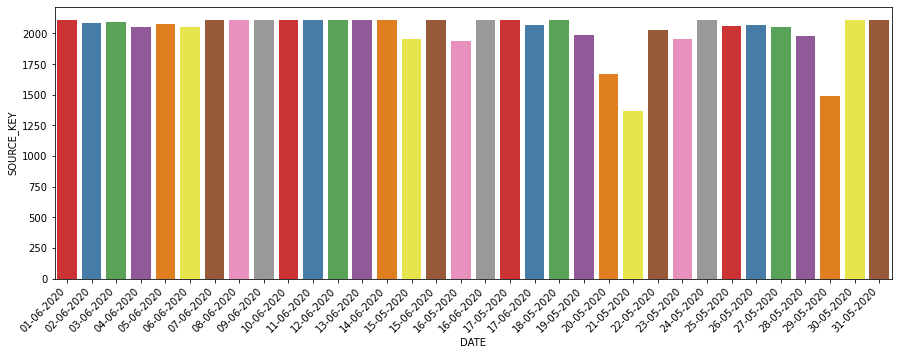

In [26]:
plant_1_generation = plant_1_generation_data.groupby("DATE")['SOURCE_KEY'].count().reset_index()
df = plant_1_generation.sort_values('DATE',ascending=False)
plt.figure(figsize=(15,5))
chart = sns.barplot(
    data = plant_1_generation,
    x = 'DATE',
    y = 'SOURCE_KEY',
    palette = 'Set1'
)
chart = chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light',
)
plt.show()

# Plant 1 Generation Data w.r.t Date and DC POWER

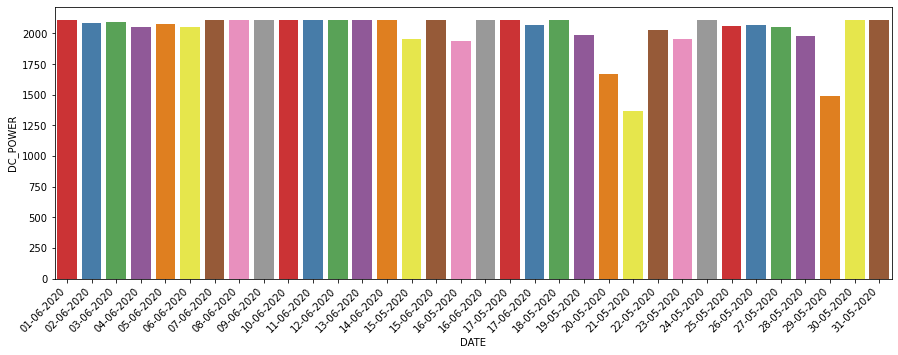

In [27]:
plant_1_generation = plant_1_generation_data.groupby("DATE")['DC_POWER'].count().reset_index()
df = plant_1_generation.sort_values('DATE',ascending=False)
plt.figure(figsize=(15,5))
chart = sns.barplot(
    data = plant_1_generation,
    x = 'DATE',
    y = 'DC_POWER',
    palette = 'Set1'
)
chart = chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light',
)
plt.show()

# Plant 1 Generation Data w.r.t Date and AC POWER

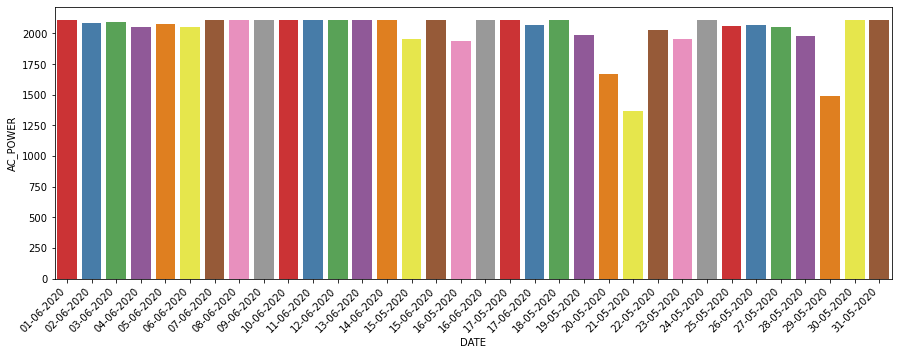

In [28]:
plant_1_generation = plant_1_generation_data.groupby("DATE")['AC_POWER'].count().reset_index()
df = plant_1_generation.sort_values('DATE',ascending=False)
plt.figure(figsize=(15,5))
chart = sns.barplot(
    data = plant_1_generation,
    x = 'DATE',
    y = 'AC_POWER',
    palette = 'Set1'
)
chart = chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light',
)
plt.show()

# Plant 2 Generation Data w.r.t Date and Total Inverters

In [29]:
df_date = plant_2_generation_data['DATE_TIME'].str.split()
x = []
for d in df_date:
    va = d[0]
    x.append(va)
plant_2_generation_data['DATE'] = pd.DataFrame(x)
plant_2_generation_data.drop(['DATE_TIME'],axis=1,inplace=True)

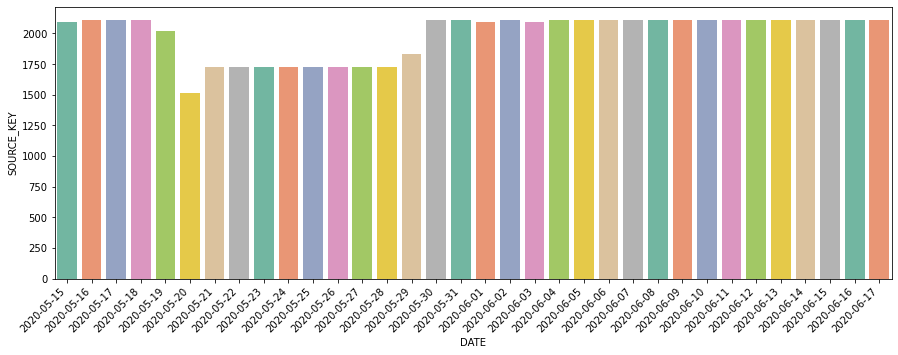

In [30]:
plant_2_generation = plant_2_generation_data.groupby("DATE")['SOURCE_KEY'].count().reset_index()
df = plant_2_generation.sort_values('DATE',ascending=False)
plt.figure(figsize=(15,5))
chart = sns.barplot(
    data = plant_2_generation,
    x = 'DATE',
    y = 'SOURCE_KEY',
    palette = 'Set2'
)
chart = chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light',
)
plt.show()

# Plant 2 Generation Data w.r.t Date and DC POWER

In [31]:
plant_2_generation = plant_2_generation_data.groupby("DATE")['DC_POWER'].count().reset_index()
df = plant_2_generation.sort_values('DATE',ascending=False)
plt.figure(figsize=(15,5))
chart = sns.barplot(
    data = plant_1_generation,
    x = 'DATE',
    y = 'AC_POWER',
    palette = 'Set2'
)
chart = chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light',
)
plt.show()

# Plant 2 Generation Data w.r.t Date and AC POWER

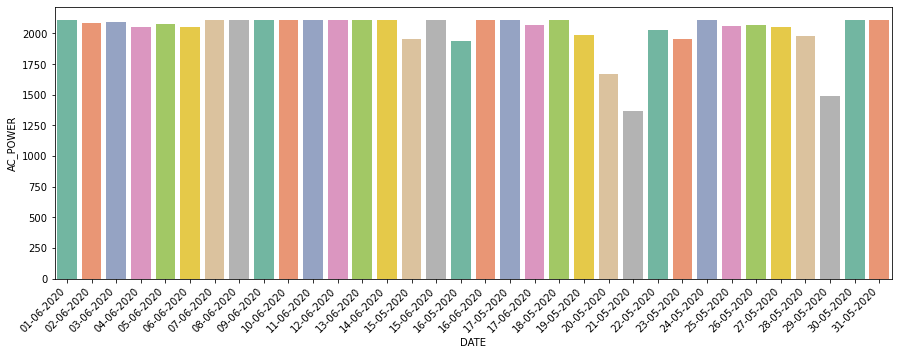

In [32]:
plant_2_generation = plant_2_generation_data.groupby("DATE")['AC_POWER'].count().reset_index()
df = plant_2_generation.sort_values('DATE',ascending=False)
plt.figure(figsize=(15,5))
chart = sns.barplot(
    data = plant_1_generation,
    x = 'DATE',
    y = 'AC_POWER',
    palette = 'Set2'
)
chart = chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light',
)
plt.show()